# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

# Data Loading

In [3]:
df = pd.read_csv('df1.csv', index_col=0)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0
4,2018-01-01,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0,1,1,Jan,1


In [4]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [5]:
df.WEEKDAY.value_counts()

0    1052066
4    1042073
3    1034899
2    1012457
1    1002900
6     993378
5     854628
Name: WEEKDAY, dtype: int64

In [6]:
df.head(3)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0


<b>WEEKDAY GLOSSARY</b>

* 0 = Monday
* 1 = Tuesday
* 2 = Weednesday
* 3 = Thursday
* 4 = Friday
* 5 = Saturday
* 6 = Sunday

# Preprocessing

Even though a lot of pre-processing and cleaning has been done on a separate notebook, this one will be only aiming to obtain a final dataframe for the modeling which will have the top 20 cities only. The reason to do it this way is because the DEST feature is a categorical column of 358 values. The hot encoding will then be done for this 20 instead of the 358 total destinations.  

In [7]:
df.DEST.value_counts().iloc[:20]

Chicago              407267
Atlanta              386390
New York             288598
Dallas-Fort Worth    271201
Denver               231611
Houston              228072
Charlotte            223197
Los Angeles          219027
San Francisco        172189
Phoenix              171543
Las Vegas            158877
Minneapolis          157251
Detroit              155612
Boston               144121
Seattle              138969
Newark               138622
Orlando              136327
Arlington            128172
Salt Lake City       112570
Philadelphia         112451
Name: DEST, dtype: int64

In [8]:
top_cities = df.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,Chicago,407267
1,Atlanta,386390
2,New York,288598
3,Dallas-Fort Worth,271201
4,Denver,231611


In [9]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

array(['Chicago', 'Atlanta', 'New York', 'Dallas-Fort Worth', 'Denver',
       'Houston', 'Charlotte', 'Los Angeles', 'San Francisco', 'Phoenix',
       'Las Vegas', 'Minneapolis', 'Detroit', 'Boston', 'Seattle',
       'Newark', 'Orlando', 'Arlington', 'Salt Lake City', 'Philadelphia'],
      dtype=object)

In [10]:
# Creating a list with top 20 cities only:
city_list = top_cities['DEST'].tolist()

In [11]:
# Checking the list's content
city_list

['Chicago',
 'Atlanta',
 'New York',
 'Dallas-Fort Worth',
 'Denver',
 'Houston',
 'Charlotte',
 'Los Angeles',
 'San Francisco',
 'Phoenix',
 'Las Vegas',
 'Minneapolis',
 'Detroit',
 'Boston',
 'Seattle',
 'Newark',
 'Orlando',
 'Arlington',
 'Salt Lake City',
 'Philadelphia']

Now we will use this list ot filter the main dataframe and create a new one called dfm which stands for dataframe for modeling

In [12]:
boolean_series = df.DEST.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0,0
6,2018-01-01,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,Jan,0,0


In [13]:
dfm.DEST.unique()

array(['Denver', 'San Francisco', 'Chicago', 'Las Vegas', 'Newark',
       'Atlanta', 'Los Angeles', 'Houston', 'Salt Lake City', 'Orlando',
       'Detroit', 'Charlotte', 'Boston', 'Phoenix', 'Minneapolis',
       'Dallas-Fort Worth', 'New York', 'Philadelphia', 'Arlington',
       'Seattle'], dtype=object)

In [14]:
dfm.DEST.value_counts()

Chicago              407267
Atlanta              386390
New York             288598
Dallas-Fort Worth    271201
Denver               231611
Houston              228072
Charlotte            223197
Los Angeles          219027
San Francisco        172189
Phoenix              171543
Las Vegas            158877
Minneapolis          157251
Detroit              155612
Boston               144121
Seattle              138969
Newark               138622
Orlando              136327
Arlington            128172
Salt Lake City       112570
Philadelphia         112451
Name: DEST, dtype: int64

In [15]:
dfm.shape # New dataframe ready reduced to almost half the size of the original one

(3982067, 21)

In [16]:
df.shape # Previous dataframe before this final filter

(6992401, 21)

Because we only chose the top 20 cities you can see how the size of the dataframe has reduced itself to almost half its original size, going from 7.07 million rows to just over 4 million. this is not a negative thing as 4 million is still a large number of row and we are considering 20 cities only out of 358.

Before this dataframe is saved we need to review the type of each columns and try to minimize the categoricals when possible. The reason for this is because as we know a categorical variable is a variable whose values take on the value of labels and Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model

In [17]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982067 entries, 0 to 7213445
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         int64         
 5   DEP_DELAY            float64       
 6   TAXI_OUT             float64       
 7   WHEELS_OFF           int64         
 8   WHEELS_ON            int64         
 9   TAXI_IN              float64       
 10  CRS_ARR_TIME         int64         
 11  ARR_DELAY            float64       
 12  CRS_ELAPSED_TIME     float64       
 13  ACTUAL_ELAPSED_TIME  float64       
 14  AIR_TIME             float64       
 15  DISTANCE             float64       
 16  DAY                  int64         
 17  MONTH                int64         
 18  MONTH_AB             object        
 19  FLIGHT_STATUS        

First step to get rid of columns that  won't be using:<br>

After some research to what are the 15 real reasons for flights being delayed, and surprisingly to me many of the ones that we have on my dataframe aren't. Therefore, before we drop some of the features, go ovee this list to better understand why we dropped some of them:

1. Air traffic control<br>
2. Adverse weather<br>
3. Bird strikes<br>
4. Knock-on effect<br>
5. Strikes<br>
6. Connecting passengers<br>
7. Connecting bags<br>
8. Cargo<br>
9. Waiting for crew<br>
10. Crew rest requirements<br>
11. Catering<br>
12. Security clearance<br>
13. Aircraft preparations<br>
14. Mechanical issue<br>
15. Weight restrictions<br>

source: <a href="https://www.claimcompass.eu/blog/why-is-my-flight-delayed/">Link</a>



* FLIGHT_DATE: This is a categorial and we really don't need it as I have the DAY and MONTH<br>
* TAXI_OUT, WHEELS_OFF, WHEELS_ON, and TAXI_ON<br>
* DAY: During the EDA we realized that it doesn't have much of an impact.




In [18]:
dfm = dfm.drop(columns=['FL_DATE', 'MONTH_AB'])

In [19]:
dfm.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [20]:
dfm.shape

(3982067, 19)

In [21]:
dfm.to_csv('dfm.csv')

# Colinearity Check

In [22]:
dfm.to_csv('dfm.csv')

In [23]:
abs(dfm.corr())>.75

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
DEP_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
TAXI_OUT,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_OFF,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_ON,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
TAXI_IN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
CRS_ARR_TIME,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
ARR_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
CRS_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False
ACTUAL_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False


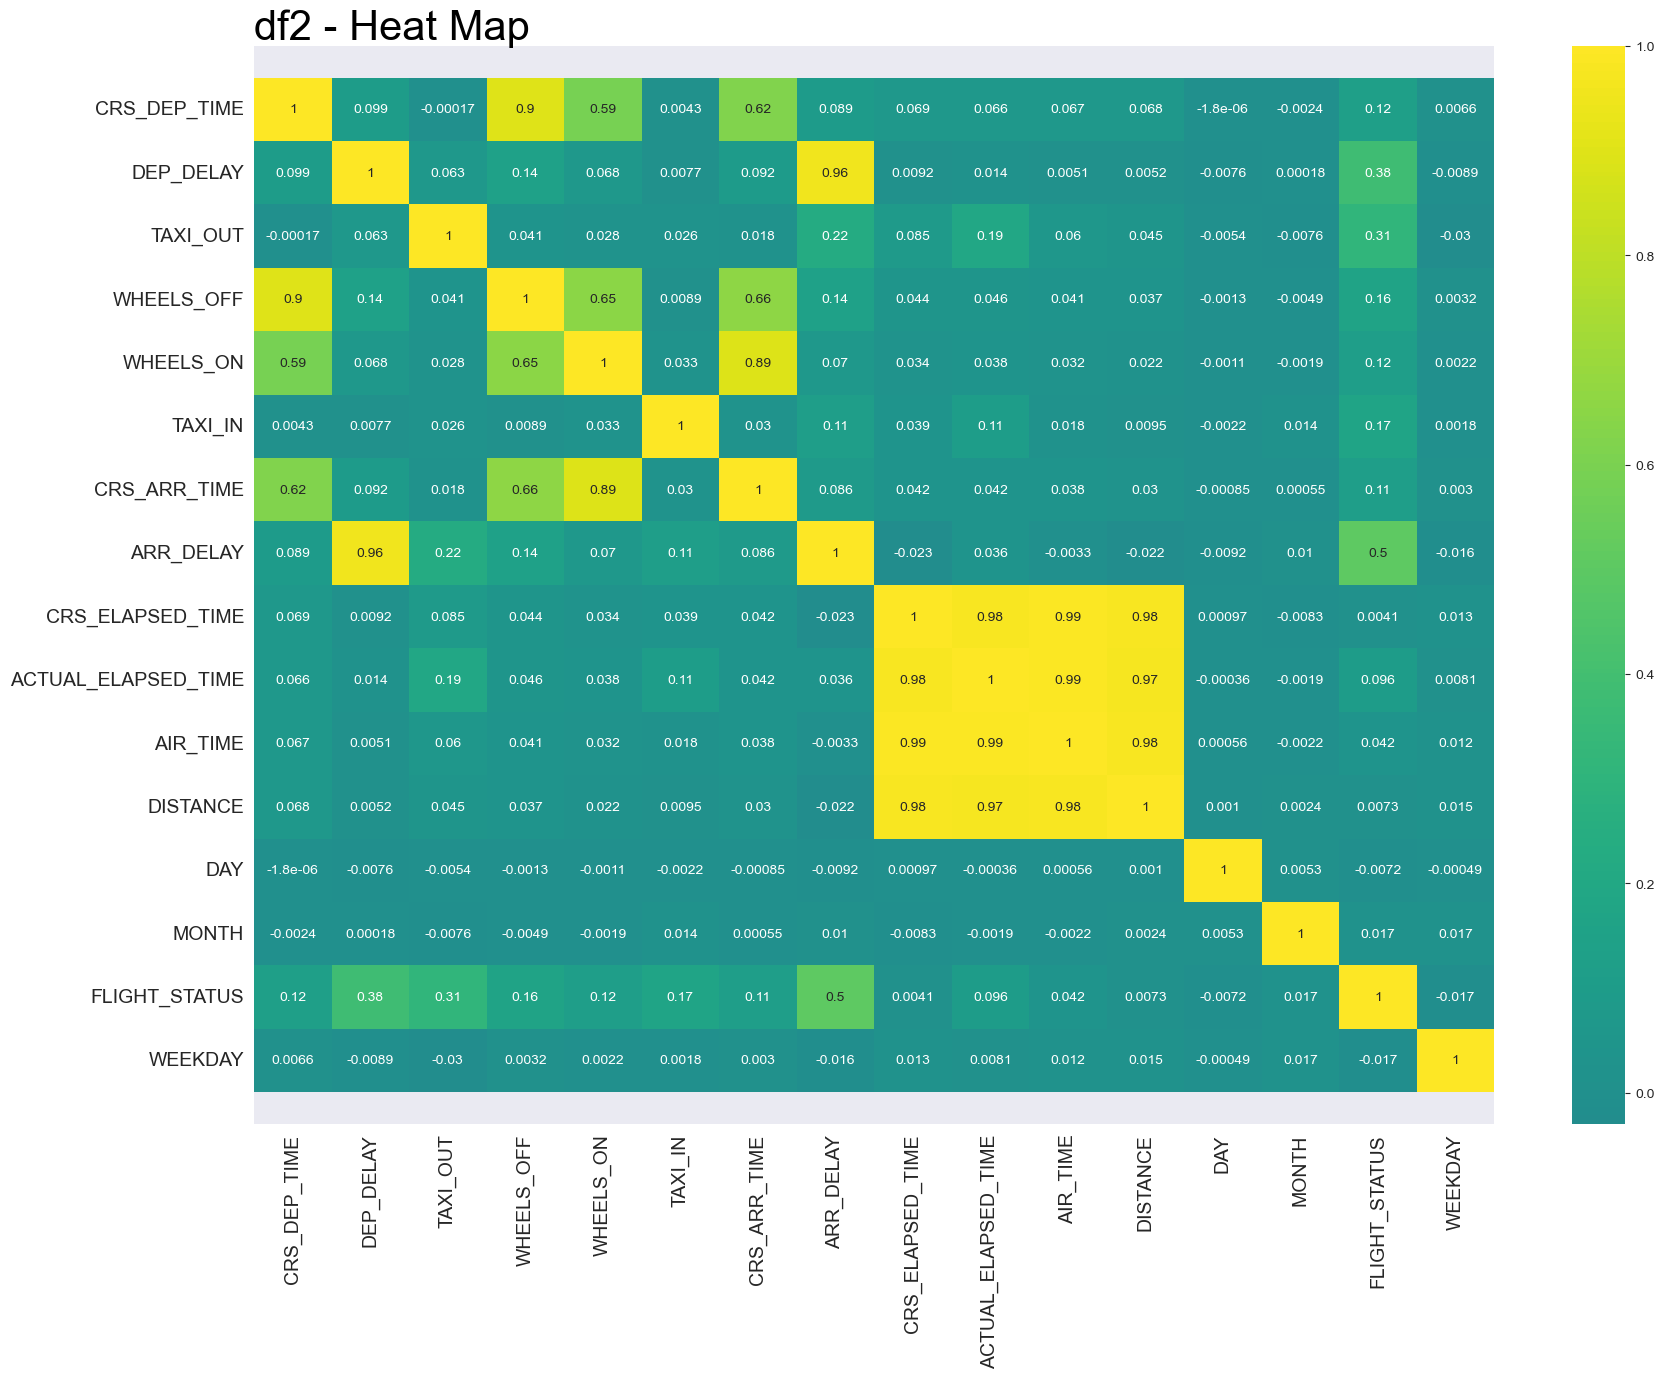

In [24]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

The missing features are the categorical ones so we will deal with them directly in the modeling phase. Here, we are going to try to reduce the possibility of colinearity. We set up a threshold at 75% on the correlation matrix and we get the output as the following:
1. ARR_DELAY with DEP_DELAY<br>
2. CRS_ELAPSED_TIME with DISTANCE<br>
3. ACTUAL_ELAPSED_TIME with CRS_ELAPSED_TIME
4. DISTANCE with ACTUAL_ELAPSED_TIME

And there is a possible multicollinearity with relationship 2, 3, and 4


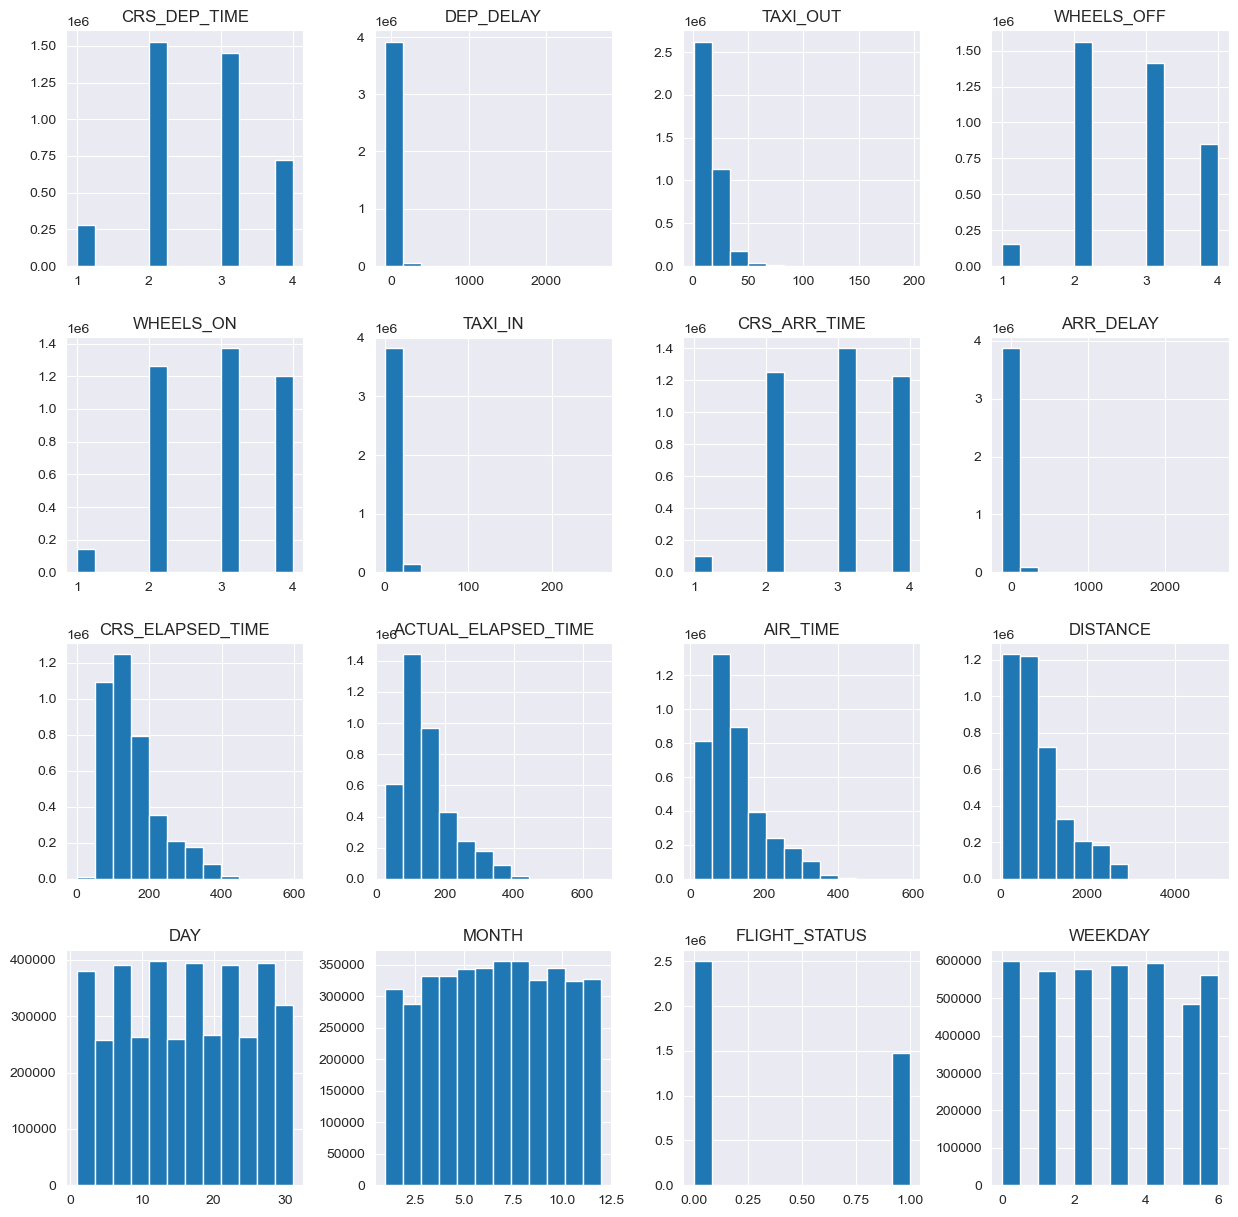

In [25]:
dfm.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [26]:
dfm_jan = dfm[(dfm['MONTH'] == 1)]
dfm_jan.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [27]:
dfm_jan.MONTH.value_counts()

1    310659
Name: MONTH, dtype: int64

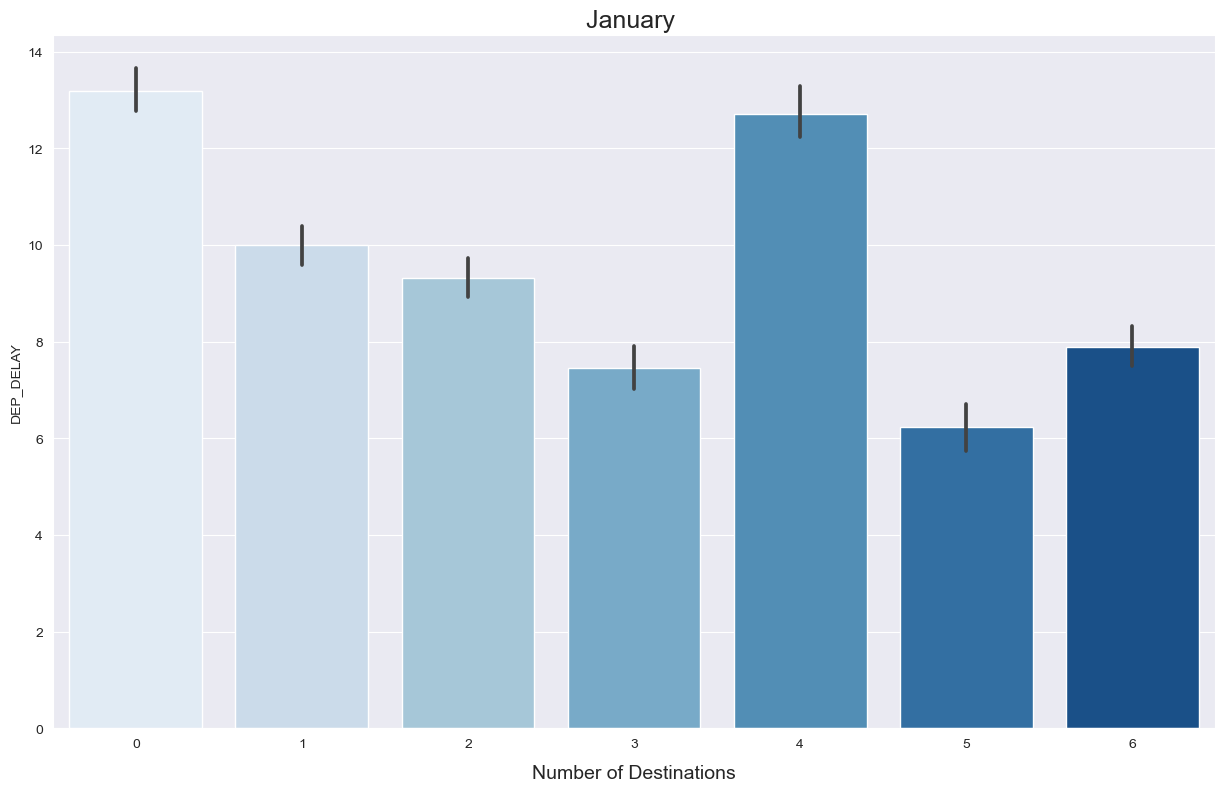

In [28]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="WEEKDAY", y="DEP_DELAY", data=dfm_jan, palette="Blues")
plt.title('January ', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()